## Notebook was only used for development purposes

#### Likely not up to date anymore...

In [ ]:
import sleap
import ipywidgets
import os
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image

def reduce_path(path, levels):
    for _ in range(levels):
        path = os.path.dirname(path)
    return path

# Function to calculate the Euclidean distance between two points
def calculate_distance(x1, y1, x2, y2):
    return int(math.sqrt((x2 - x1)**2 + (y2 - y1)**2))

def calculate_body_length_px(coordinates):
    head_x, head_y = coordinates[0]
    thorax_x, thorax_y = coordinates[1]
    abdomen_x, abdomen_y = coordinates[2]
    
    # Calculate distances
    distance_head_thorax = calculate_distance(head_x, head_y, thorax_x, thorax_y)
    distance_thorax_abdomen = calculate_distance(thorax_x, thorax_y, abdomen_x, abdomen_y)
    
    # Store the distances in a dictionary
    results = {
        'Head_length': distance_head_thorax,
        'Abdomen_length': distance_thorax_abdomen,
        'insect_length_total': distance_head_thorax + distance_thorax_abdomen
    }
    
    return results

def fetch_most_recent_model(dir_to_fetch):
    models = [f for f in glob.glob(os.path.join(dir_to_fetch, '*')) if os.path.isdir(f)]
    models.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    most_recent_model = models[0] if models else None
    return most_recent_model

def predict_body_length(image, models_folder = r"C:\Users\rolingni\AppData\Local\anaconda3\envs\sleap\models"):
    filename = os.path.basename(image)
    print(filename)
    root_folder = reduce_path(image, levels = 1)
    save_path = os.path.join(root_folder, "cropped_and_annotated")
    os.makedirs(save_path, exist_ok=True)
    save_path = os.path.join(save_path, filename)
    most_recent_model = fetch_most_recent_model(models_folder)
    
    predictor = sleap.load_model([most_recent_model], batch_size=16)
    img = sleap.load_video(image)
    predictions = predictor.predict(img)
    if len(predictions)>0:
        predictions[0].plot(scale=1)
        plt.savefig(save_path, format='jpg')
    else:
        img = Image.open(image)
        img.save(save_path)
    prediction = predictions[0]
    skeleton_values = prediction[0].numpy()
    lengths = calculate_body_length_px(skeleton_values)
    print("Model used:", most_recent_model)
    print(root_folder)
    
    return lengths

In [ ]:
lengths = predict_body_length(image = r"C:\Users\rolingni\Desktop\input_test\20240626105929_cropped_1.jpg")
print(f"Insect length: {lengths['insect_length_total']}")

# Testabschnitt

In [5]:
import cv2
import os
import numpy as np
import sleap
import ipywidgets
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image

def fetch_most_recent_model(dir_to_fetch):
    models = [f for f in glob.glob(os.path.join(dir_to_fetch, '*')) if os.path.isdir(f)]
    models.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    most_recent_model = models[0] if models else None
    return most_recent_model

def load_cropped_images_into_video(image_folder,  fps=30):
    images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    images.sort()  # Ensure the images are in the correct order
    output_video_path = r"C:\Users\rolingni\AppData\Local\anaconda3\envs\sleap\temp_video.mp4"

    if not images:
        print("No images found in the folder.")
        return

    # Read the first image to get the dimensions
    height = 185
    width = 167

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can use other codecs like 'XVID'
    video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for image in images:
        frame = cv2.imread(os.path.join(image_folder, image))
        frame = cv2.resize(frame, (width, height))  # Resize to ensure all frames have the same dimensions
        video.write(frame)

    video.release()
    return output_video_path

In [8]:
def create_video_from_images_np(image_folder, fps=30):
    images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    images.sort()  # Ensure the images are in the correct order

    # Target dimensions
    target_height = 185
    target_width = 167

    # Create a list to store video frames
    video_frames = []

    for image in images:
        frame = cv2.imread(os.path.join(image_folder, image))
        frame = cv2.resize(frame, (target_width, target_height))  # Resize to target dimensions
        video_frames.append(frame)

    # Convert the list of frames to a NumPy array with the correct shape
    video_array = np.array(video_frames)
    return video_array

In [10]:
nils = create_video_from_images_np(image_folder)
video = sleap.Video.from_numpy(nils)

In [11]:
image_folder = r"C:\Users\rolingni\Desktop\input_test"
models_folder = r"C:\Users\rolingni\AppData\Local\anaconda3\envs\sleap\models"
video = load_cropped_images_into_video(image_folder, fps=30)
images = sleap.load_video(video)
most_recent_model = fetch_most_recent_model(models_folder)
predictor = sleap.load_model([most_recent_model], batch_size=16)
predictions = predictor.predict(nils)

Output()

In [ ]:
predictions

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


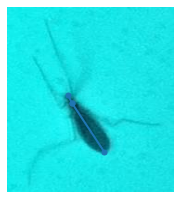

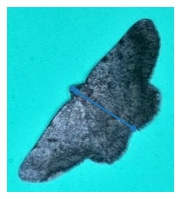

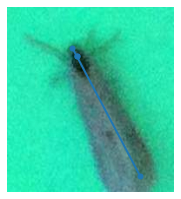

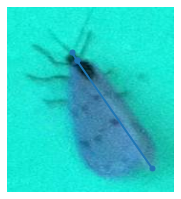

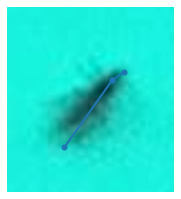

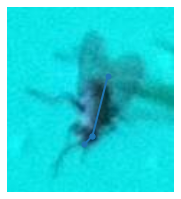

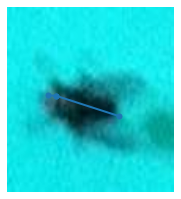

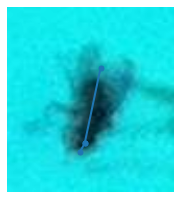

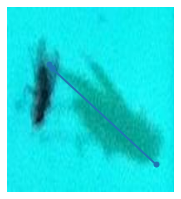

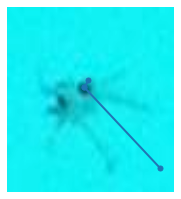

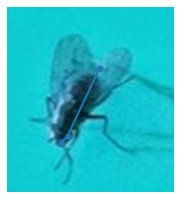

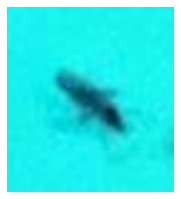

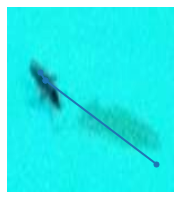

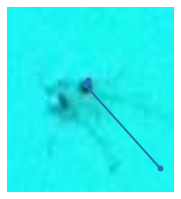

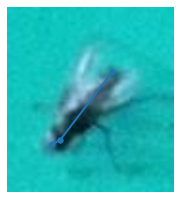

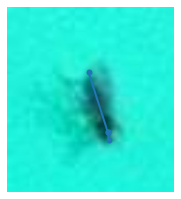

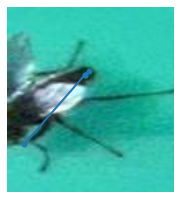

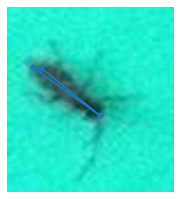

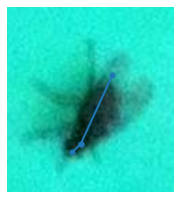

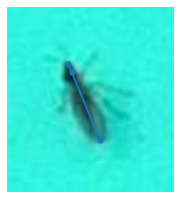

In [12]:
for prediction in predictions[:20]:
    print(prediction.plot(scale = 1))

In [ ]:
import json

# Function to open and print a JSON file
def print_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        print(json.dumps(data, indent=4))

# Example usage
file_path = r'C:\Users\rolingni\AppData\Local\anaconda3\envs\sleap\models\240828_151557.single_instance.n=64\training_config.json'
print_json_file(file_path)